In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


Data Cleaning

In [4]:
df.dropna(inplace=True)

In [5]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [6]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [7]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [8]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [9]:
print(df.columns.tolist())  # Show exact column names

['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ']


In [10]:
df.columns = df.columns.str.strip()

In [11]:
df[['day', 'month', 'year', 'RH', 'Ws']] = df[['day', 'month', 'year', 'RH', 'Ws']].apply(pd.to_numeric, errors='coerce')
df[['day', 'month', 'year', 'RH', 'Ws']] = df[['day', 'month', 'year', 'RH', 'Ws']].fillna(0).astype(int)

float_cols = ['Temperature', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
df[float_cols] = df[float_cols].apply(pd.to_numeric, errors='coerce')
df[float_cols] = df[float_cols].fillna(df[float_cols].mean())

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    float64
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(8), int64(5), object(1)
memory usage: 28.6+ KB


In [13]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [14]:
df.to_csv('Algerian_forest_fires_dataset_cleaned.csv', index=False)

EDA

In [15]:
df_copy = df.drop(['day', 'month', 'year'], axis=1)

In [16]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29.0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29.0,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,26.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25.0,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,27.0,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [17]:
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
Classes            1
not fire           1
not fire           1
Name: count, dtype: int64

In [18]:
# Encoding of categories in classes
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [19]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29.0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29.0,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25.0,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27.0,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [20]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
242,30.0,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
243,28.0,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
244,27.0,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
245,24.0,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0
246,24.0,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0


In [21]:
df_copy['Classes'].value_counts()

Classes
1    138
0    106
Name: count, dtype: int64

Density Plot for all features

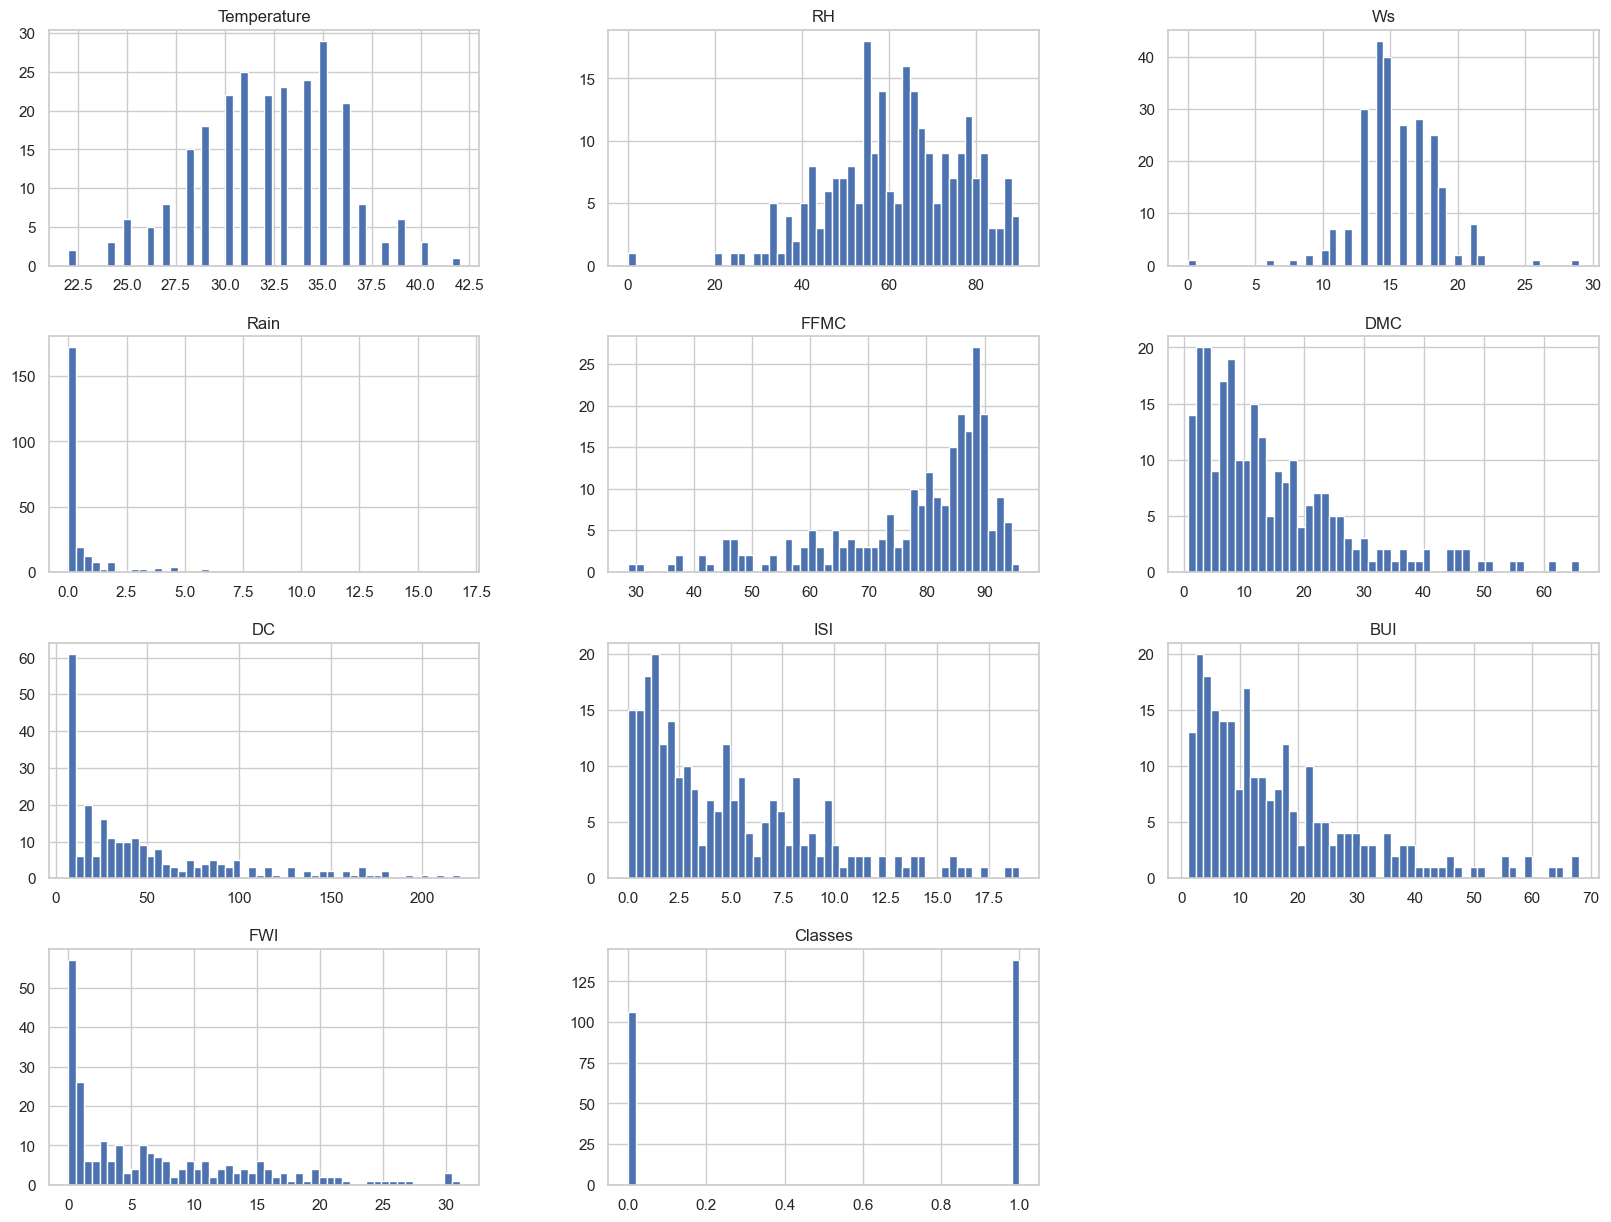

In [24]:
import seaborn as sns
sns.set(style="whitegrid")
df_copy.hist(bins=50, figsize=(20,15))
plt.show()

In [26]:
percentages = df_copy['Classes'].value_counts(normalize=True)*100

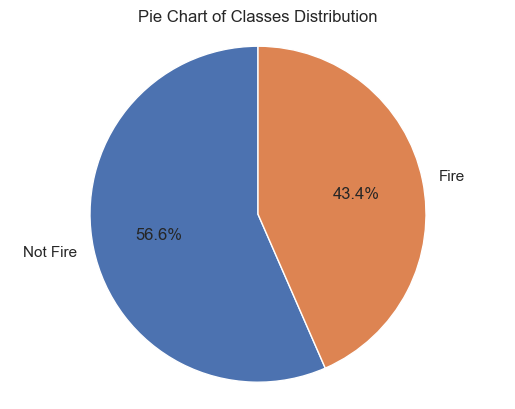

In [27]:
classlabels = ['Not Fire', 'Fire']
plt.pie(percentages, labels=classlabels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Classes Distribution')
plt.axis('equal')
plt.show()

Correlation

In [28]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.000000,-0.629132,-0.268240,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.515199
RH,-0.629132,1.000000,0.308634,0.214755,-0.622829,-0.394554,-0.219183,-0.663194,-0.341745,-0.561097,-0.431302
Ws,-0.268240,0.308634,1.000000,0.161698,-0.157024,-0.000680,0.074609,0.008044,0.029641,0.030517,-0.084599
Rain,-0.326492,0.214755,0.161698,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.378498
FFMC,0.676568,-0.622829,-0.157024,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.768275
DMC,0.485687,-0.394554,-0.000680,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.584731
DC,0.376284,-0.219183,0.074609,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.510315
ISI,0.603871,-0.663194,0.008044,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.734034
BUI,0.459789,-0.341745,0.029641,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.585712
FWI,0.566670,-0.561097,0.030517,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.718079


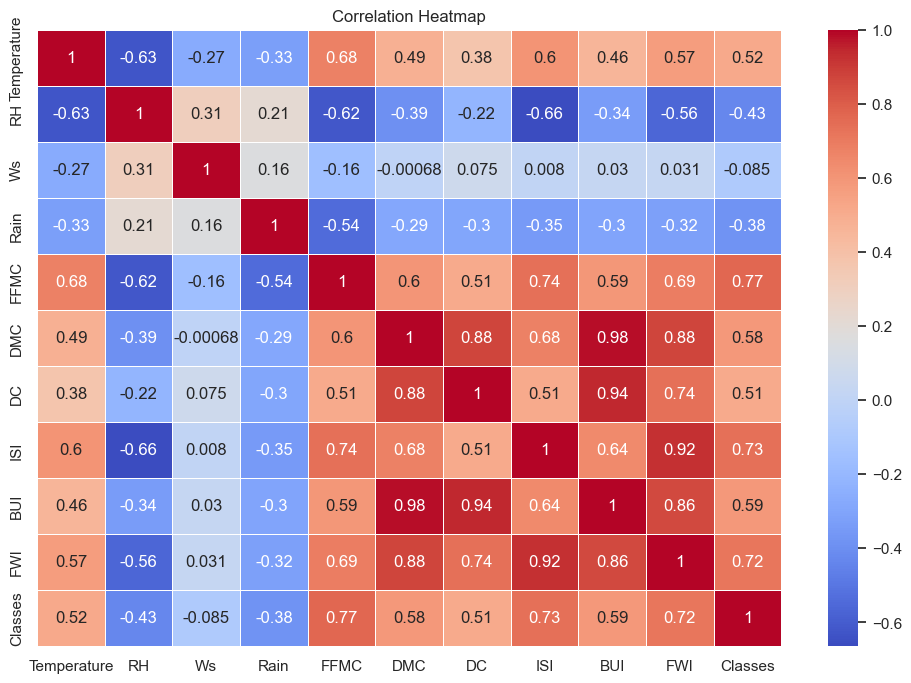

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

BoxPlots

<Axes: xlabel='Classes', ylabel='FWI'>

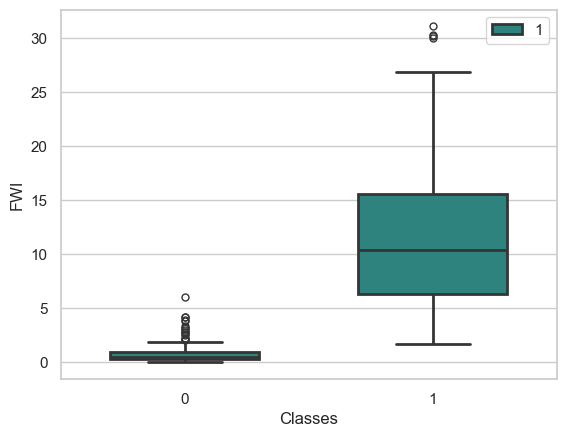

In [34]:
sns.boxplot(x='Classes', y='FWI', data=df_copy,hue=1, palette='viridis', linewidth=2, fliersize=5, whis=1.5, saturation=0.75, width=0.6)

<Axes: xlabel='Classes', ylabel='Temperature'>

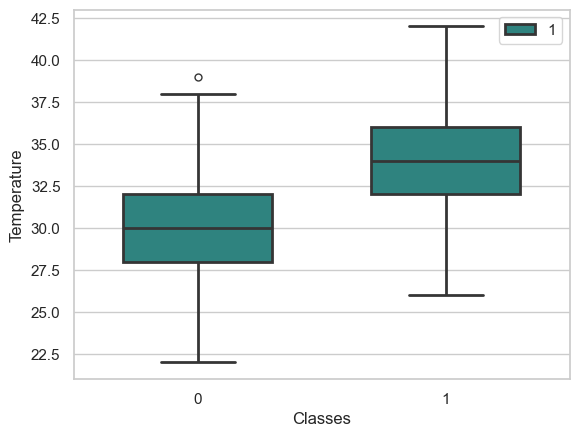

In [35]:
sns.boxplot(x='Classes', y='Temperature', data=df_copy,hue=1, palette='viridis', linewidth=2, fliersize=5, whis=1.5, saturation=0.75, width=0.6)

C:\Users\Vinit Solanki\AppData\Local\Temp\ipykernel_15864\1036892598.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Classes', data=df_copy, palette='viridis')


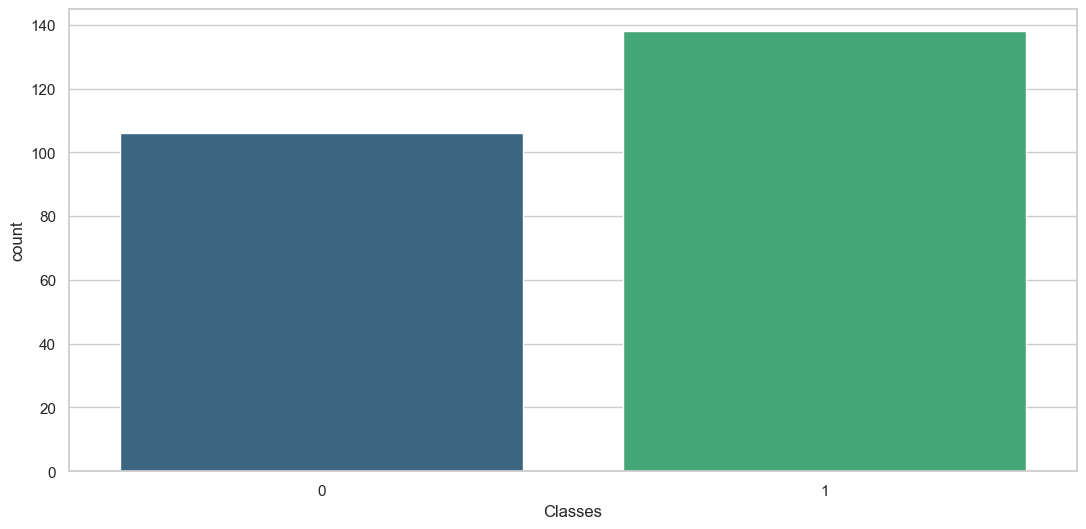

In [53]:
plt.subplots(figsize=(13, 6))
sns.set_style('whitegrid')
sns.countplot(x='Classes', data=df_copy, palette='viridis')
plt.show()

Feature Selection

In [56]:
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [57]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29.0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29.0,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,26.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25.0,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,27.0,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [58]:
# Encoding of categories in classes
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29.0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29.0,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25.0,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27.0,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [59]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
242,30.0,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
243,28.0,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
244,27.0,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
245,24.0,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0
246,24.0,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0


In [60]:
df['Classes'].value_counts()

Classes
1    138
0    106
Name: count, dtype: int64

In [61]:
X = df.drop('FWI', axis=1)
y = df['FWI']

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(170, 10)
(74, 10)
(170,)
(74,)


In [64]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
Temperature,1.000000,-0.614870,-0.213831,-0.339590,0.702701,0.487153,0.382744,0.605954,0.462230,0.514866
RH,-0.614870,1.000000,0.309629,0.221126,-0.611494,-0.361915,-0.194216,-0.667216,-0.312182,-0.449592
Ws,-0.213831,0.309629,1.000000,0.202403,-0.130512,0.015227,0.084820,0.031818,0.046399,-0.081222
Rain,-0.339590,0.221126,0.202403,1.000000,-0.552910,-0.288651,-0.298693,-0.347726,-0.299920,-0.370915
FFMC,0.702701,-0.611494,-0.130512,-0.552910,1.000000,0.600694,0.503081,0.744131,0.589790,0.774107
DMC,0.487153,-0.361915,0.015227,-0.288651,0.600694,1.000000,0.876012,0.642272,0.981524,0.582360
DC,0.382744,-0.194216,0.084820,-0.298693,0.503081,0.876012,1.000000,0.480459,0.940553,0.493802
ISI,0.605954,-0.667216,0.031818,-0.347726,0.744131,0.642272,0.480459,1.000000,0.612182,0.740107
BUI,0.462230,-0.312182,0.046399,-0.299920,0.589790,0.981524,0.940553,0.612182,1.000000,0.582955
Classes,0.514866,-0.449592,-0.081222,-0.370915,0.774107,0.582360,0.493802,0.740107,0.582955,1.000000


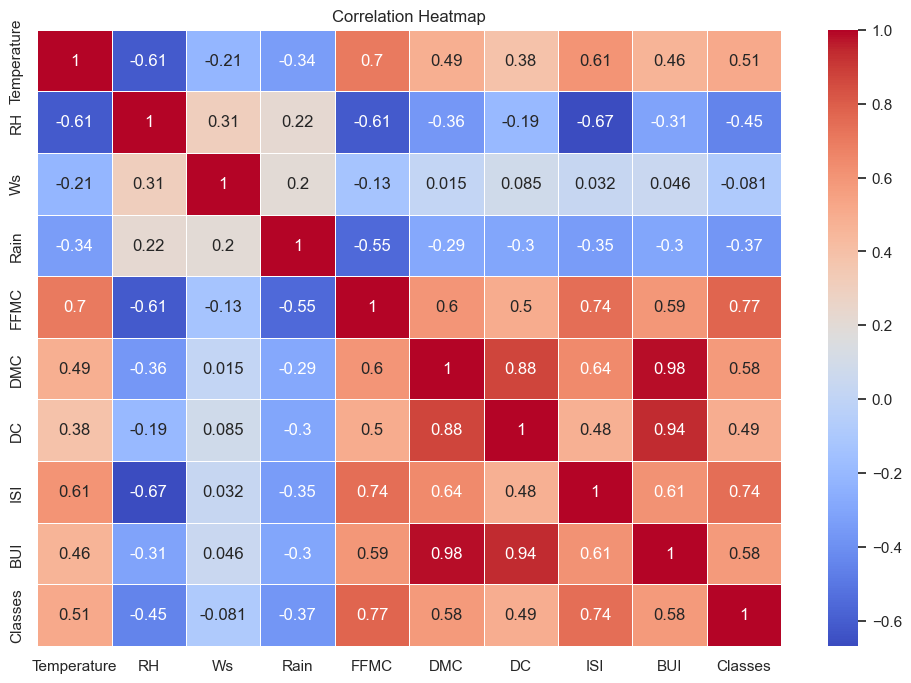

In [65]:
# Check for multicollinearity
plt.figure(figsize=(12,8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
def correlation(data, threshold):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [69]:
# setting the threshold requires domain knowledge
corr_features = correlation(X_train, 0.85)

In [70]:
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
print(f'Correlated features dropped: {corr_features}')
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

Correlated features dropped: {'DC', 'BUI'}
X_train shape: (170, 8)
X_test shape: (74, 8)


Standardization

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
X_train_scaled

array([[ 0.81680033, -1.83898086,  0.54303383, ...,  0.71183332,
         2.17422742,  0.8991722 ],
       [-1.07848422,  1.21135276, -0.13826323, ..., -0.17098352,
        -0.09680708,  0.8991722 ],
       [ 0.54604539, -0.21646297,  0.2023853 , ...,  0.3827834 ,
         0.64426734,  0.8991722 ],
       ...,
       [-1.89074903,  0.88684919,  0.54303383, ..., -1.07787718,
        -1.07693776, -1.11213403],
       [ 0.27529046, -0.3462644 ,  0.2023853 , ...,  0.07781032,
         0.47692795,  0.8991722 ],
       [-0.53697435,  0.9517499 ,  1.90562796, ..., -1.02972353,
        -0.86178713, -1.11213403]], shape=(170, 8))

Text(0.5, 1.0, 'After Scaling')

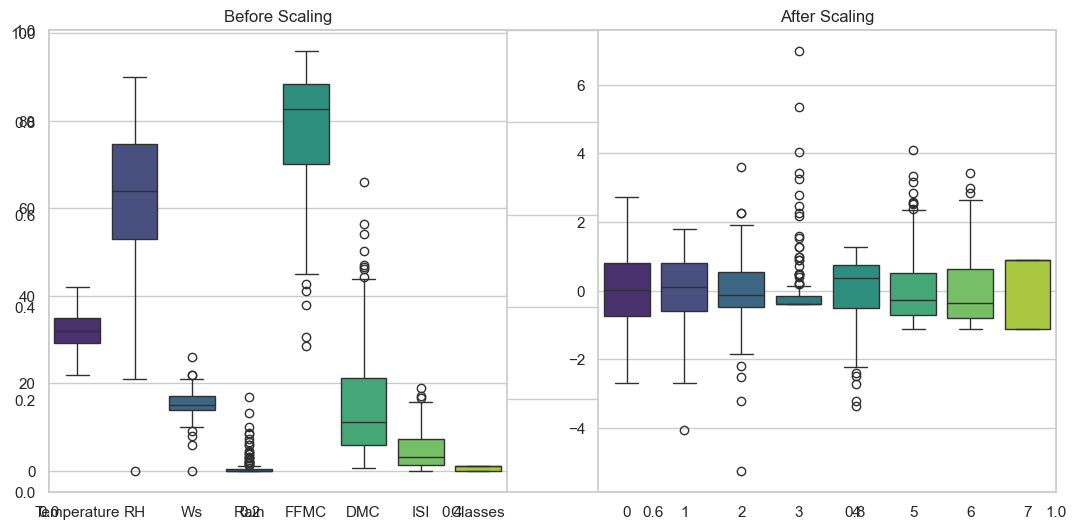

In [73]:
# Effect of Standard Scaler
plt.subplots(figsize=(13, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train, palette='viridis')
plt.title('Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled, palette='viridis')
plt.title('After Scaling')

Linear Regression Model

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [75]:
y_pred = lin_reg.predict(X_test_scaled)

In [76]:
mae = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mae}')
print(f'R2 Score: {r2}')

Mean Squared Error: 0.7303596135630077
R2 Score: 0.9873582674728344


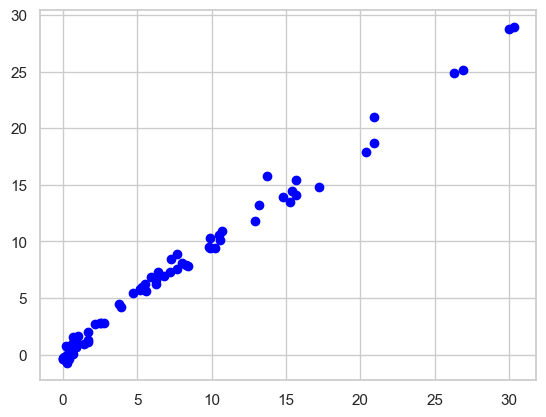

In [77]:
plt.scatter(y_test, y_pred, color='blue')

In [79]:
# Lasso Regression
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

y_pred = lasso.predict(X_test_scaled)

mae = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mae}')
print(f'R2 Score: {r2}')

Mean Squared Error: 3.034845413972072
R2 Score: 0.9474701184563512


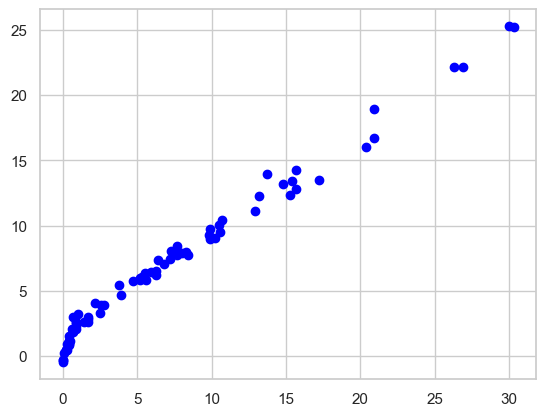

In [80]:
plt.scatter(y_test, y_pred, color='blue')

In [84]:
# LassoCV
from sklearn.linear_model import LassoCV
# by default cv = 5
lasso_cv = LassoCV(cv =5)
lasso_cv.fit(X_train_scaled, y_train)

y_pred = lasso_cv.predict(X_test_scaled)

mae = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mae}')
print(f'R2 Score: {r2}')

Mean Squared Error: 0.75180971556009
R2 Score: 0.9869869894789642


In [85]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

y_pred = ridge.predict(X_test_scaled)

mae = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mae}')
print(f'R2 Score: {r2}')

Mean Squared Error: 0.7783988003327165
R2 Score: 0.9865267612686475


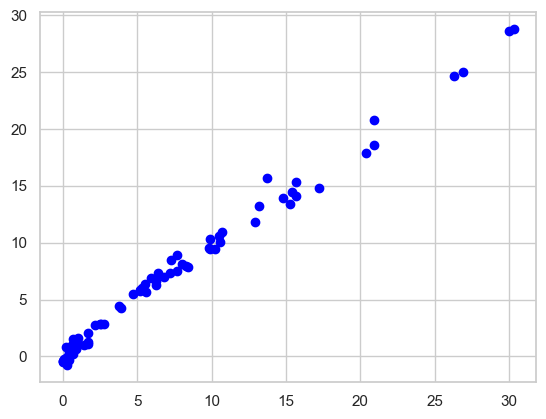

In [86]:
plt.scatter(y_test, y_pred, color='blue')

Mean Squared Error: 0.7783988003327165
R2 Score: 0.9865267612686475


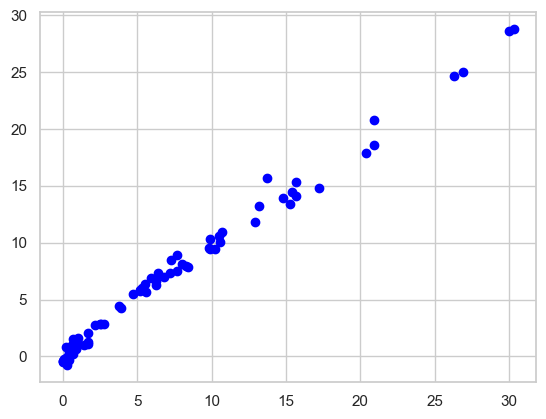

In [87]:
# RidgeCV
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(cv=5)
ridge_cv.fit(X_train_scaled, y_train)

y_pred = ridge_cv.predict(X_test_scaled)

mae = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mae}')
print(f'R2 Score: {r2}')
plt.scatter(y_test, y_pred, color='blue')

In [88]:
lasso_cv.coef_

array([-0.        ,  0.        ,  0.10951763, -0.03544814, -0.68872867,
        3.47742595,  4.56651443,  0.47634505])

In [89]:
ridge_cv.coef_

array([ 0.0263442 , -0.02113892,  0.14076771, -0.07271485, -0.7574384 ,
        3.47490519,  4.50748047,  0.55050318])

Mean Squared Error: 0.7942784487521646
R2 Score: 0.9862519017826954


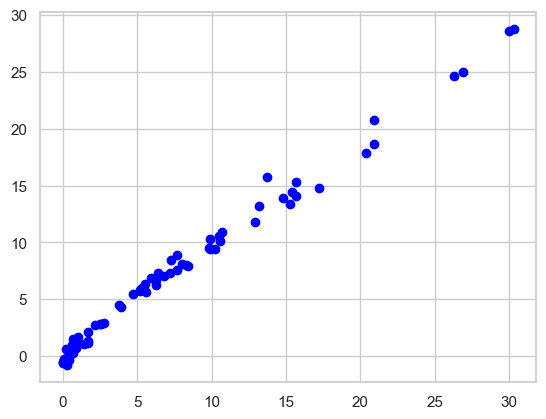

In [90]:
# Elastic Net CV
from sklearn.linear_model import ElasticNetCV
elastic_net = ElasticNetCV(cv=5, l1_ratio=0.5)
elastic_net.fit(X_train_scaled, y_train)

y_pred = elastic_net.predict(X_test_scaled)

mae = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mae}')
print(f'R2 Score: {r2}')

plt.scatter(y_test, y_pred, color='blue')

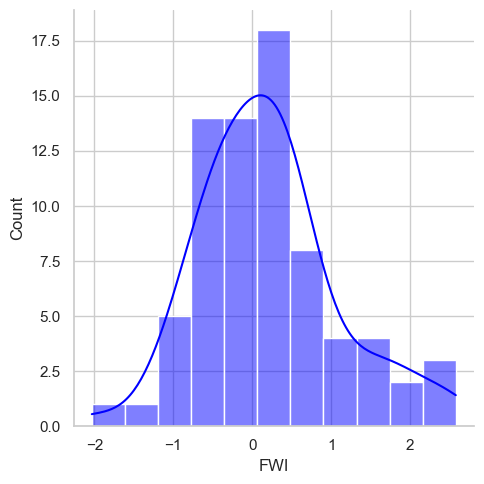

In [91]:
sns.displot(y_test - y_pred, kde=True, color='blue')